In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error,accuracy_score
from sklearn.neighbors import KNeighborsClassifier 

df = pd.read_csv('covid-19-malaysia.csv', parse_dates=['date'])
#df['year'] = df['date'].map(lambda x: x.year)
#df['month'] = df['date'].map(lambda x: x.month)
df.info()
df.describe()
df.corr()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 5 columns):
date          237 non-null datetime64[ns]
cases         237 non-null int64
discharged    237 non-null int64
death         237 non-null int64
icu           237 non-null int64
dtypes: datetime64[ns](1), int64(4)
memory usage: 9.4 KB


,cases,discharged,death,icu
cases,1.000000,0.975645,0.989894,-0.150486
discharged,0.975645,1.000000,0.945745,-0.330656
death,0.989894,0.945745,1.000000,-0.097992
icu,-0.150486,-0.330656,-0.097992,1.000000


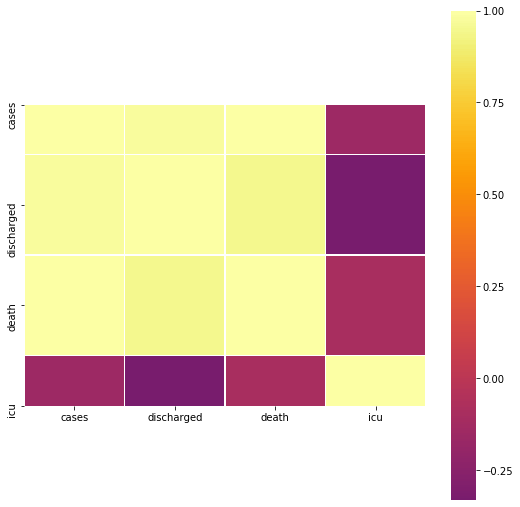

In [2]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(9,9))
sns.heatmap(df.corr(), center=0, cmap='inferno', square=True, linewidths=.5, cbar={"shrink":.5}, ax=ax)

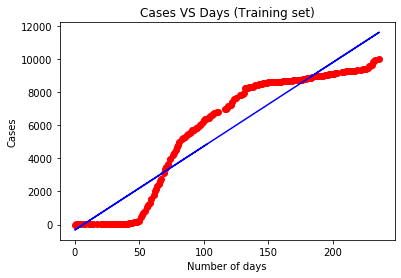

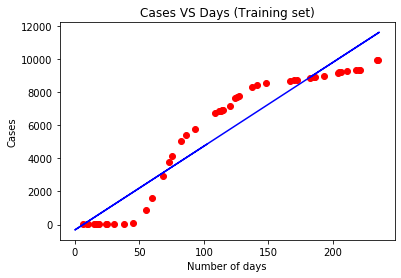

prediction:  [14948.5077465]
R^2: 0.9049709077940338
Root Mean Squared Error: 1157.9057267154972
Coefficients:  [50.78349178]
Interception: -286.539786073964


In [4]:
df['days'] = df.index

del df['date']
del df['discharged']
del df['death']
del df['icu']

covid19 = df[['days', 'cases']]

X = covid19.iloc[:, :-1].values
y = covid19.iloc[:, 1].values

#y = y.ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, shuffle=True)

lr = LinearRegression()
lr.fit(X_train,y_train)

viz_train = plt
viz_train.scatter(X_train, y_train, color='red')
viz_train.plot(X_train, regressor.predict(X_train), color='blue')
viz_train.title('Cases VS Days (Training set)')
viz_train.xlabel('Number of days')
viz_train.ylabel('Cases')
viz_train.show()

viz_test = plt
viz_test.scatter(X_test, y_test, color='red')
viz_test.plot(X_train, regressor.predict(X_train), color='blue')
viz_test.title('Cases VS Days (Training set)')
viz_test.xlabel('Number of days')
viz_test.ylabel('Cases')
viz_test.show()

print('prediction: ',lr.predict([[300]]))

y_pred = lr.predict(X_test)
print("R^2: {}".format(lr.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))
print('Coefficients: ',lr.coef_)
print('Interception:',lr.intercept_)

In [5]:
#knn prediction score

knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train, y_train)

y_pred1 = knn.predict(X_test)

a_score = accuracy_score(y_test,y_pred1)
v_score = cross_val_score(knn,X,y, cv=5)
print('Accuracy score: {}'.format(a_score))
print('5 cross validation result: {}'.format(v_score))


Accuracy score: 0.08333333333333333
5 cross validation result: [0.01886792 0.46153846 1.         1.         1.        ]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
